In [75]:
import uproot
import pandas
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [77]:
# file_pT_5  = '/eos/user/m/mkovac/Data/Muons/DY_2016_8_6_2019/pt_eta_score_pT_5.h5'
# file_pT_10 = '/eos/user/m/mkovac/Data/Muons/DY_2016_8_6_2019/pt_eta_score_pT_10.h5'

# file_pT_5  = '/eos/user/m/mkovac/Data/Muons/DY_2017_8_6_2019/pt_eta_score_pT_5.h5'
# file_pT_10 = '/eos/user/m/mkovac/Data/Muons/DY_2017_8_6_2019/pt_eta_score_pT_10.h5'

file_pT_5  = '/eos/user/m/mkovac/Data/Muons/DY_2018_8_6_2019/pt_eta_score_pT_5.h5'
file_pT_10 = '/eos/user/m/mkovac/Data/Muons/DY_2018_8_6_2019/pt_eta_score_pT_10.h5'

df_pT_5  = pandas.read_hdf(file_pT_5)
df_pT_10 = pandas.read_hdf(file_pT_10)

In [78]:
df_pT_5  = df_pT_5.query("y > -1 & mu_dxy < 0.5 & mu_dz < 1")
df_pT_10 = df_pT_10.query("y > -1 & mu_dxy < 0.5 & mu_dz < 1")

# df_pT_5["score_norm"] = (2.0/(1.0 + np.exp(-0.5*df_pT_5['bdt_score_default']))-1)
# df_pT_10["score_norm"] = (2.0/(1.0 + np.exp(-0.5*df_pT_10['bdt_score_default']))-1)

df_pT_5_sig = df_pT_5.query('y == 1')
df_pT_5_bkg = df_pT_5.query('y == 0')

df_pT_10_sig = df_pT_10.query('y == 1')
df_pT_10_bkg = df_pT_10.query('y == 0')


df_pT_10.head(5)

,mu_pT,mu_eta,is_pf_mu,mu_pf_charged_had_iso,mu_pf_neutral_had_iso,mu_pf_photon_iso,mu_pu_charged_had_iso,mu_sip,mu_dxy,mu_dz,genNpu,y,bdt_score_default,bdt_score_optimized
809941,19.399456,1.993508,True,0.000000,0.764144,0.000000,0.000000,1.170315,0.002389,0.005709,29,1,3.770852,2.940873
3612039,24.723997,1.590821,True,3.183279,0.000000,0.770411,0.743942,0.602116,0.000714,0.002136,20,1,2.208122,0.911232
3267269,30.324087,2.097681,True,0.000000,1.496388,1.484351,0.877864,0.338777,0.000283,0.001239,26,1,4.603802,5.137311
663615,30.504999,-1.034708,True,0.000000,0.000000,0.000000,1.184118,0.351466,0.000415,0.000040,56,1,6.077654,6.045829
2706898,42.748013,1.808534,True,0.824140,0.000000,0.000000,0.521247,0.037848,0.000024,0.000124,18,1,5.112012,5.041695


In [79]:
root_file_DY_test = '/eos/user/m/mkovac/Data/Muons/DY_2018_8_6_2019/test.root'
tree_DY_test = uproot.open(root_file_DY_test)["ntuplizer/tree"]
df_DY_test = tree_DY_test.pandas.df(entrystop = 1000000)

In [80]:
# df_DY_test.head(5)

In [81]:
df_DY_test = df_DY_test.query('mu_dz < 1 and mu_dxy < 0.5 and (is_tracker_mu or is_global_mu)')

# df_DY_test["score_norm"] = (2.0/(1.0 + np.exp(-0.5*df_DY_test['score']))-1)

df_DY_test_sig = df_DY_test.query('matchedToGenMu == 1')
df_DY_test_bkg = df_DY_test.query('matchedToGenMu == 0 or matchedToGenMu == 3')

df_DY_test_sig_hpT = df_DY_test_sig.query('mu_pT > 10')
df_DY_test_sig_lpT = df_DY_test_sig.query('mu_pT < 10')

df_DY_test_bkg_hpT = df_DY_test_bkg.query('mu_pT > 10')
df_DY_test_bkg_lpT = df_DY_test_bkg.query('mu_pT < 10')

# MVA score plots

68.6443584342
2.06550001461


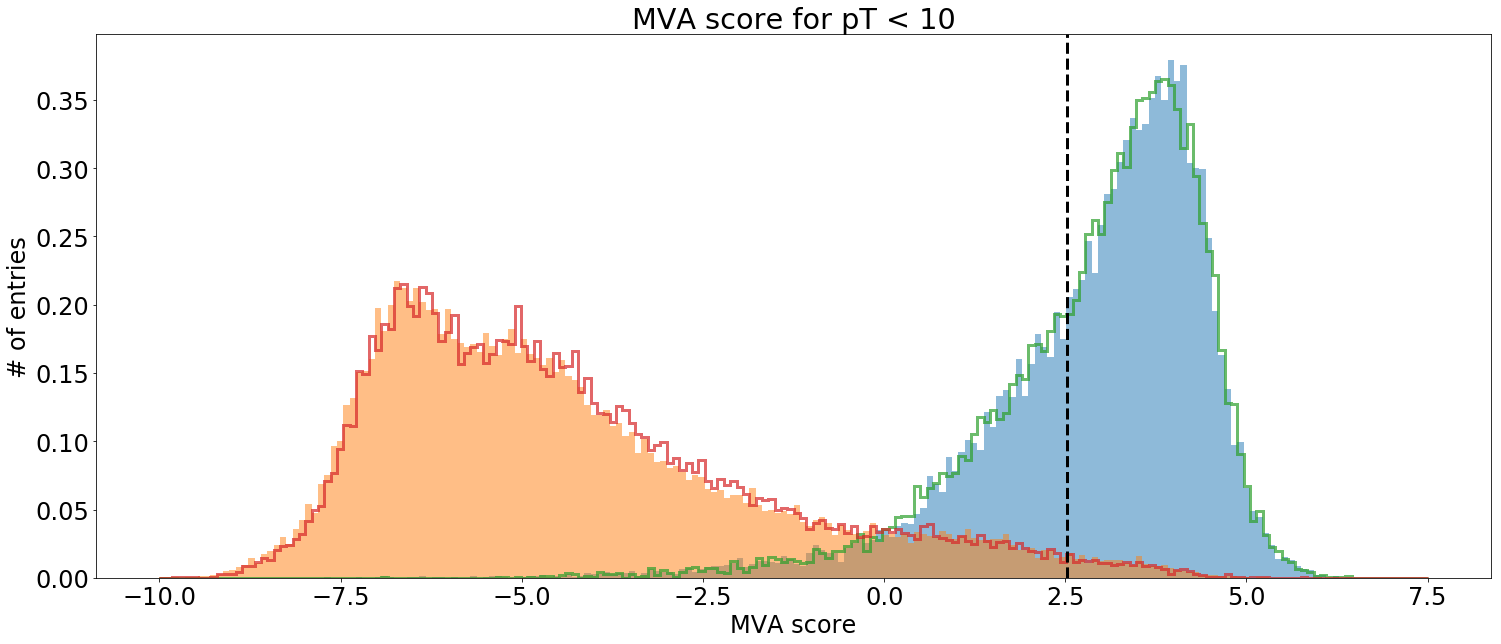

In [92]:
plt.figure(figsize = (25,10))
_, bins, _ = plt.hist(df_pT_5_sig['bdt_score_default'], bins=200, histtype='bar', alpha=0.5, linewidth=2, density=1, range=[-10,7.5])
_ = plt.hist(df_pT_5_bkg['bdt_score_default'], bins=bins, histtype='bar', alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_sig_lpT['score'], bins=bins, histtype='step', alpha=0.7, linewidth=3, density=1)
_ = plt.hist(df_DY_test_bkg_lpT['score'], bins=bins, histtype='step', alpha=0.7, linewidth=3, density=1)

plt.title('MVA score for pT < 10')
plt.ylabel('# of entries')
plt.xlabel('MVA score')

plt.axvline(x = 2.521, ls = 'dashed', color = 'black', lw = 3)

print len(df_pT_5_sig.query('bdt_score_default > 2.521'))*1./len(df_pT_5_sig)*100
print len(df_pT_5_bkg.query('bdt_score_default > 2.521'))*1./len(df_pT_5_bkg)*100

# print len(df_DY_test_sig_lpT.query('score > 2.108'))*1./len(df_DY_test_sig_lpT)*100
# print len(df_DY_test_bkg_lpT.query('score > 2.108'))*1./len(df_DY_test_bkg_lpT)*100


94.8598656035
1.98822425122


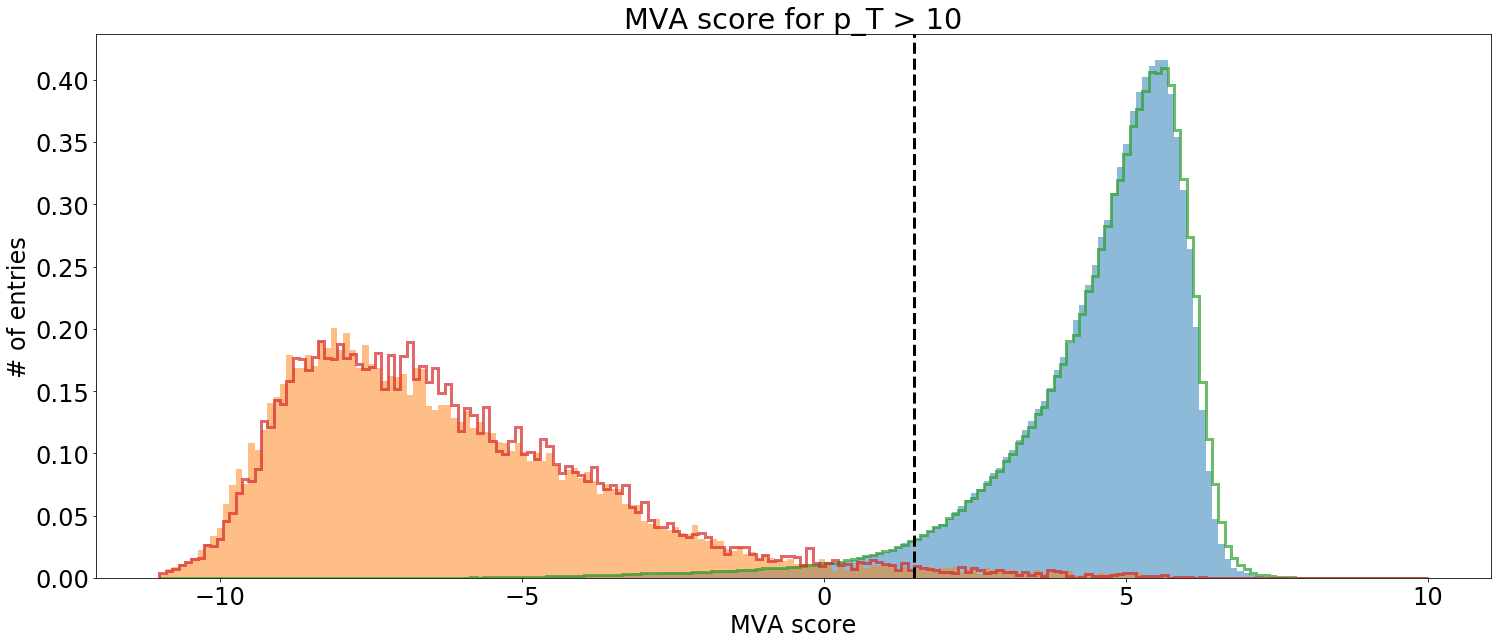

In [94]:
plt.figure(figsize = (25,10))
_, bins, _ = plt.hist(df_pT_10_sig['bdt_score_default'], bins=200, alpha=0.5, linewidth=2, density=1, range=[-11,10])
_ = plt.hist(df_pT_10_bkg['bdt_score_default'], bins=bins, alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_sig_hpT['score'], bins=bins, histtype='step', alpha=0.7, linewidth=3, density=1)
_ = plt.hist(df_DY_test_bkg_hpT['score'], bins=bins, histtype='step', alpha=0.7, linewidth=3, density=1)
plt.title('MVA score for p_T > 10')
plt.ylabel('# of entries')
plt.xlabel('MVA score')

plt.axvline(x = 1.497, ls = 'dashed', color = 'black', lw = 3)

print len(df_pT_10_sig.query('bdt_score_default > 1.497'))*1./len(df_pT_10_sig)*100
print len(df_pT_10_bkg.query('bdt_score_default > 1.497'))*1./len(df_pT_10_bkg)*100

# print len(df_DY_test_sig_hpT.query('score > 1.494'))*1./len(df_DY_test_sig_hpT)*100
# print len(df_DY_test_bkg_hpT.query('score > 1.494'))*1./len(df_DY_test_bkg_hpT)*100


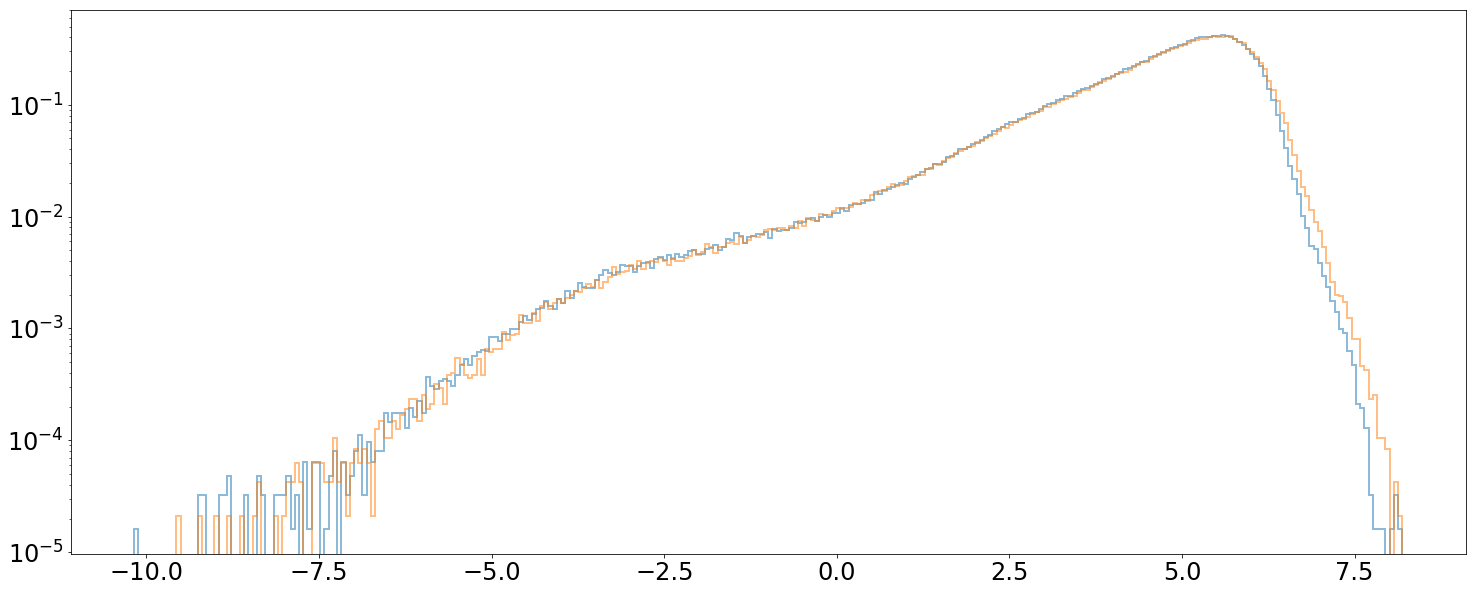

In [30]:
plt.figure(figsize = (25,10))
plt.yscale('log')
_, bins, _ = plt.hist(df_pT_10_sig['bdt_score_default'], histtype='step', bins=300, alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_sig_hpT['score'], histtype='step', bins=bins, alpha=0.5, linewidth=2, density=1)

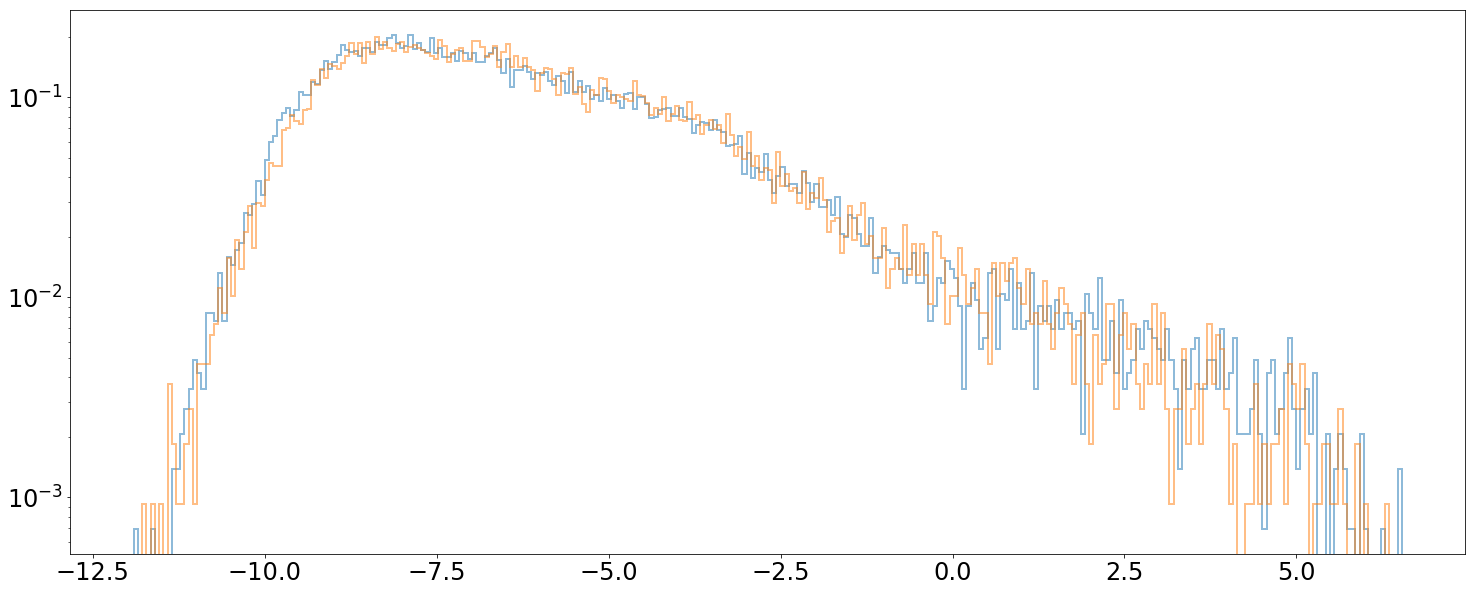

In [31]:
plt.figure(figsize = (25,10))
plt.yscale('log')
_, bins, _ = plt.hist(df_pT_10_bkg['bdt_score_default'], histtype='step', bins=300, alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_bkg_hpT['score'], histtype='step', bins=bins, alpha=0.5, linewidth=2, density=1)

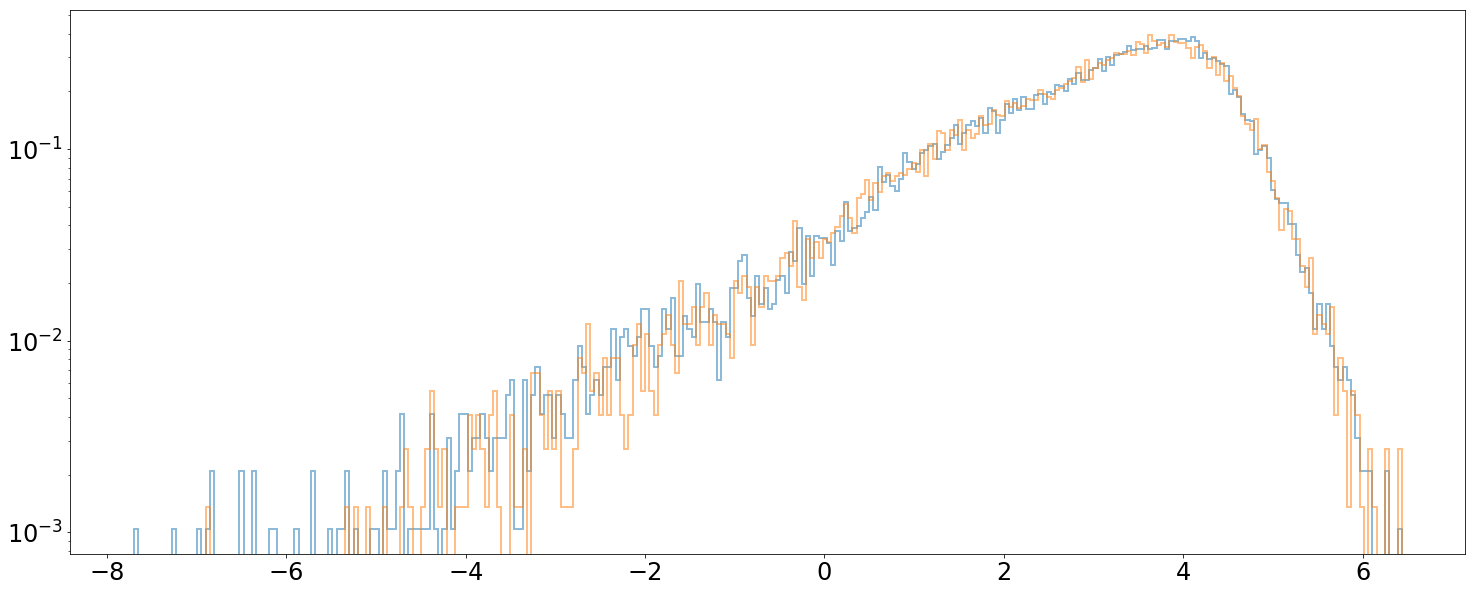

In [32]:
plt.figure(figsize = (25,10))
plt.yscale('log')
_, bins, _ = plt.hist(df_pT_5_sig['bdt_score_default'], histtype='step', bins=300, alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_sig_lpT['score'], histtype='step', bins=bins, alpha=0.5, linewidth=2, density=1)

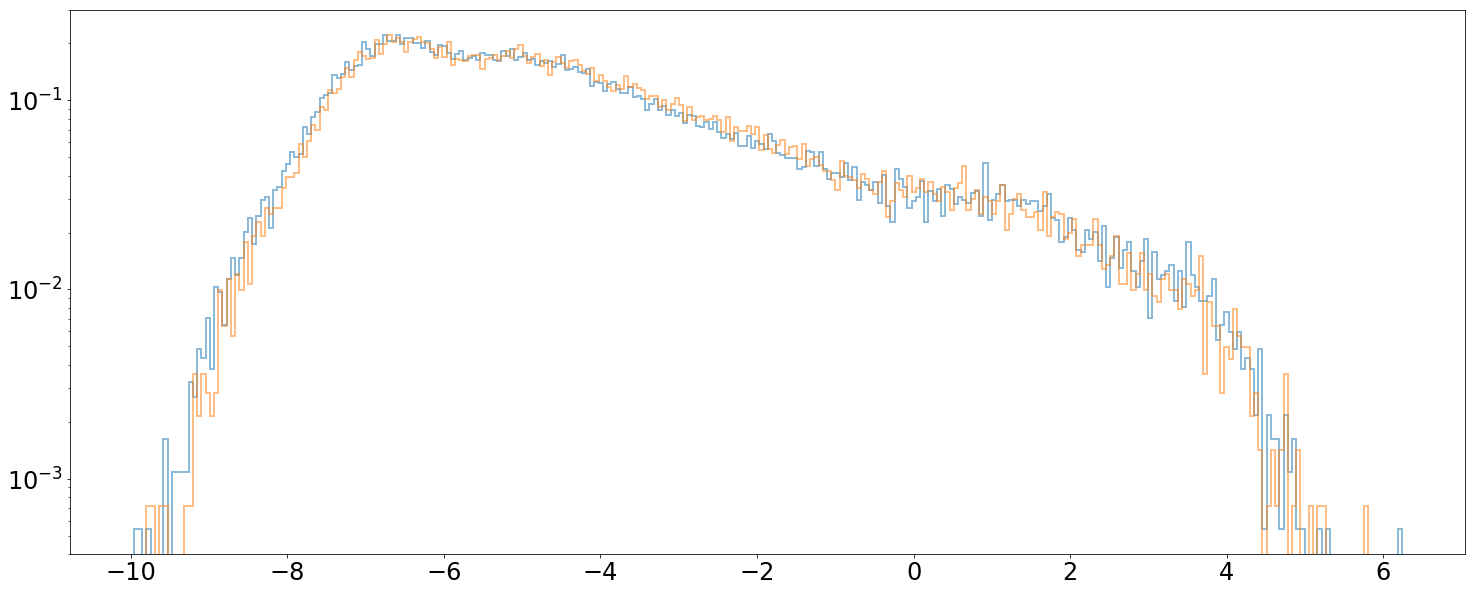

In [33]:
plt.figure(figsize = (25,10))
plt.yscale('log')
_, bins, _ = plt.hist(df_pT_5_bkg['bdt_score_default'], histtype='step', bins=300, alpha=0.5, linewidth=2, density=1)
_ = plt.hist(df_DY_test_bkg_lpT['score'], histtype='step', bins=bins, alpha=0.5, linewidth=2, density=1)